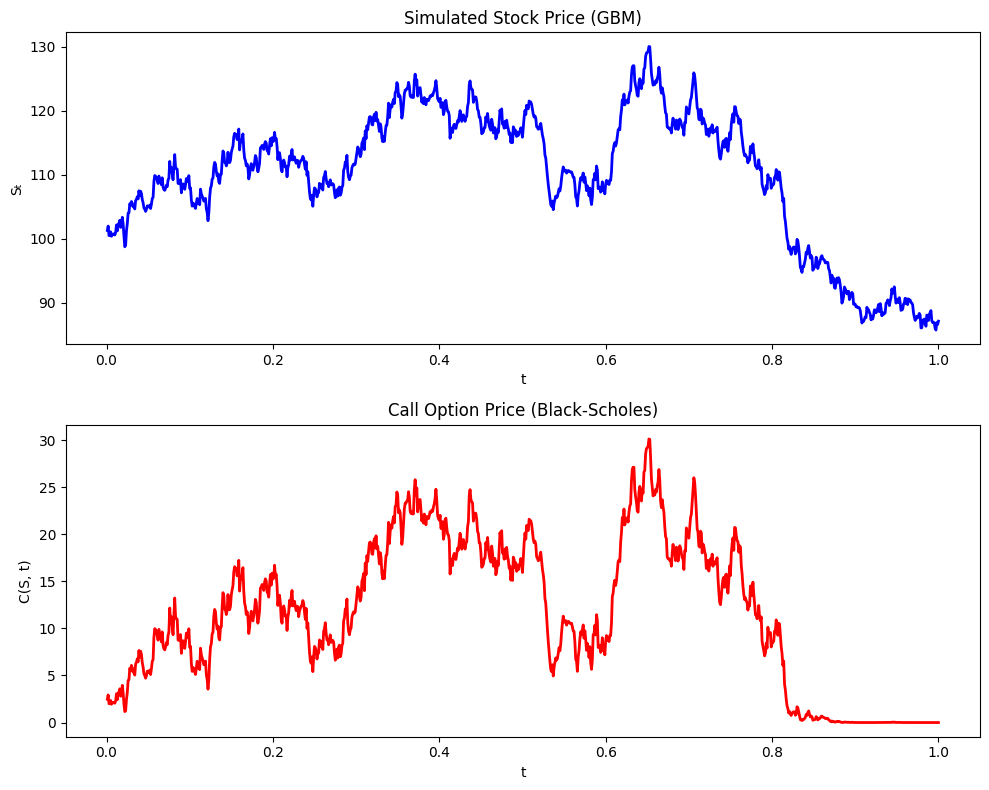

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random


# --- Parameters ---
S0 = 100         # initial stock price
K = 100          # strike price
r = 0.05         # risk-free rate
sigma = 0.3      # volatility
tau = 0.02       # time to maturity



# --- Time vector ---
T = 1000
t = np.linspace(1/T, 1, T)
dt = t[1] - t[0]


# --- Simulate Brownian motion and GBM ---
np.random.seed(10) #seed for reproducibility
Wt1 = np.random.normal(0, 1, size=T)
Wt = np.cumsum(Wt1)
St = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Wt)

# --- Black-Scholes formula for call price ---
def black_scholes_call(S, K, tau, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2) #we assume b=r (non-dividend stock)

Call_prices = black_scholes_call(St, K, tau, r, sigma)

# --- Plotting with transparent background ---
fig, axs = plt.subplots(2, 1, figsize=(10, 8), facecolor='none')

for ax in axs:
    ax.set_facecolor('none')  # transparent background for each subplot
    ax.grid(False)            # no grid

# Plot Stock Price
axs[0].plot(t, St, color='blue', linewidth=2)
axs[0].set_title("Simulated Stock Price (GBM)", fontsize=12)
axs[0].set_xlabel("t")
axs[0].set_ylabel("Sₜ")

# Plot Option Price
axs[1].plot(t, Call_prices, color='red', linewidth=2)
axs[1].set_title("Call Option Price (Black-Scholes)", fontsize=12)
axs[1].set_xlabel("t")
axs[1].set_ylabel("C(S, t)")

plt.tight_layout()
plt.show()
